# Analysing a marketing campaign
* Q1. How effective is the marketing efforts over the past month?
* Q2. What was last months conversion rate?
* Q3. What was last months retention rate? 
* Q4. Which ad language had the highest conversion rate?
* Q5. How has the conversion rate changed over time
* Q6. What age groups are each marketing channel reaching?
* Q7. Are retention rates by marketing channels consistent throughout the month?
* Q8. Explore why House ads saw lower than usual conversion rates during late January.
* Perform A/B test 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data from Datacamp
* Marketing campaign data consisting customer subscription

In [7]:
marketing = pd.read_csv('data\marketing.csv')
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


# Examine the data
* `date_served` & `date_subscribed` & `date_canceled` needs to be date format
* `age_group` can be int

In [8]:
# Print the statistics of all columns
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [9]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


### Update the data type of `converted` from object to boolean

In [10]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool


# 1. Data cleaning
* add new columns:
* `day_of_week`
* `is_correct_lang`: conveys whether the ad was shown to the user in their preferred language

### `Subscribing_channel` to numeric scale

In [11]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

### Add column `is_correct_lang`
* Yes or No based on whether the user was shown the ad in preferred language

In [12]:
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

### Convert `date_served`, `date_subscribed`, `date_canceled` to date format

In [13]:
marketing['date_served'] = pd.to_datetime(marketing.date_served)
marketing['date_subscribed'] = pd.to_datetime(marketing.date_subscribed)
marketing['date_canceled'] = pd.to_datetime(marketing.date_canceled)

### Create a day of week column from `date_subscribed` using dt.dayofweek.

In [14]:
marketing['DoW'] = marketing.date_subscribed.dt.dayofweek

In [15]:
marketing

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,4.0,Yes,2.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,4.0,Yes,2.0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,4.0,Yes,2.0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,4.0,Yes,2.0


# 2. Exploratory Data Analysis

In [16]:
import matplotlib.pyplot as plt

## Q1. How effective is the marketing efforts over the past month?

In [17]:
daily_users = marketing.groupby('date_served')['user_id'].nunique()
daily_users.head()

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

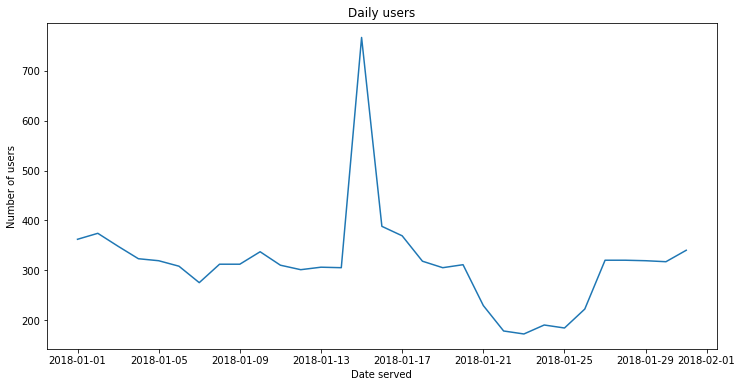

In [18]:
plt.figure(figsize=(12,6))
# Plot daily_subscribers
plt.plot(daily_users)

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')
plt.xlabel('Date served')

# Display the plot
plt.show();

## Q2. What is the last month conversion rate?


In [19]:
# Calculate the number of unique customers who subscribed
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
print(subscribers, 'number of unique customers subscribed')

1015 number of unique customers subscribed


In [20]:
# Calculate total unique customers reached
total = marketing['user_id'].nunique()
print(total, 'total number of customers reached')

7309 total number of customers reached


In [21]:
# Concersion rate
conversion_rate = subscribers/total
print('Conversion rate = {:.2f}%'.format(conversion_rate*100))

Conversion rate = 13.89%


**Helps to compare 13.89% to historical conversion rate to determine whether this is good or bad performance**

## Q3. What is the last month retention rate?


In [22]:
converted_df = marketing[marketing.converted==True]
retained = converted_df.user_id[converted_df.is_retained==True].nunique()
print(retained, 'number of customers remained subscribed in last month')

681 number of customers remained subscribed in last month


In [23]:
retention_rate = retained/subscribers
print('Retention rate = {:.2f}%'.format(retention_rate*100))

Retention rate = 67.09%


## Q4. Which language had the highest conversion rate?

In [24]:
def conversion_rate(df, variable):
    # total
    total = df.groupby(variable)['user_id'].nunique()
    
    # converted
    conv = df[df.converted==True].groupby(variable)['user_id'].nunique()
    
    return (conv/total).fillna(0)

In [25]:
lang_conv_rate = conversion_rate(marketing, 'language_displayed')
print(lang_conv_rate.sort_values(ascending=False))

language_displayed
German     0.716216
Arabic     0.500000
Spanish    0.200000
English    0.129167
Name: user_id, dtype: float64


''

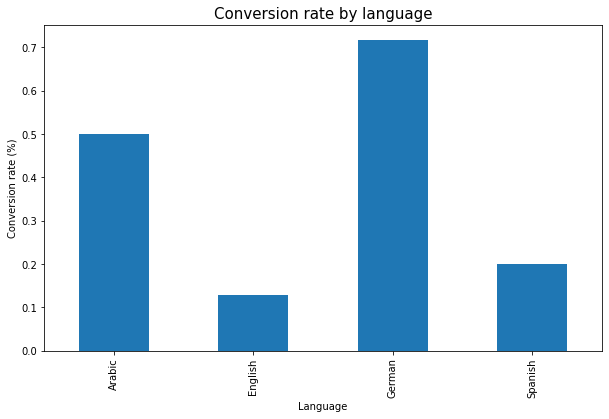

In [26]:
plt.figure(figsize=(10,6))
lang_conv_rate.plot(kind='bar')
plt.title('Conversion rate by language', fontsize=15)

plt.ylabel('Conversion rate (%)')
plt.xlabel('Language')

;

German has the highest conversion rate. 

## Q5. How has the conversion rate changed over time

In [27]:
daily_conv_rate = conversion_rate(marketing, 'date_served')

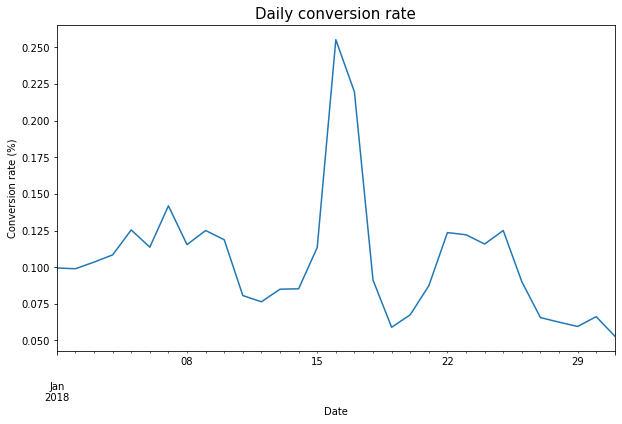

In [28]:
plt.figure(figsize=(10,6))

# Include a title and y-axis label
daily_conv_rate.plot()

plt.title('Daily conversion rate', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Conversion rate (%)');

## Q6. What age groups are each marketing channel reaching?

In [29]:
print('Types of marketing channels: ', marketing.marketing_channel.unique())

Types of marketing channels:  ['House Ads' 'Push' 'Facebook' 'Instagram' 'Email' nan]


In [30]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].nunique()

channel_age_df = pd.DataFrame(channel_age.unstack())
channel_age_df

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
marketing_channel,,,,,,,
Email,91,107,116,60,63,64,53
Facebook,256,331,289,238,217,289,175
House Ads,585,643,587,600,505,567,538
Instagram,292,301,268,252,268,218,199
Push,184,144,180,83,192,82,117


''

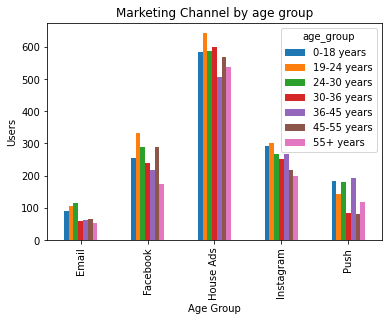

In [31]:
channel_age_df.plot(kind='bar')

plt.title('Marketing Channel by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')

;

## Q7. Are retention rates by marketing channel consistent throughout the month?

In [35]:
def retention_rate(df, variable):
    # Converted group by variable
    converted_df = df[df.converted==True].groupby(variable)['user_id'].nunique()
    
    # Retained by variable
    retained = df[df.is_retained==True].groupby(variable)['user_id'].nunique()
    
    return (retained/converted_df).fillna(0)

In [36]:
daily_retention = retention_rate(marketing, ['date_subscribed', 'subscribing_channel'])

daily_retention = pd.DataFrame(daily_retention.unstack())

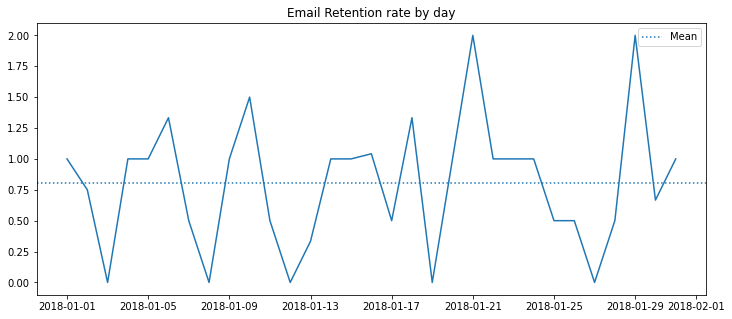

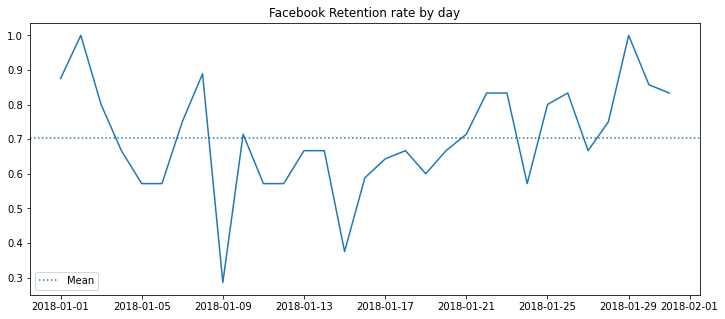

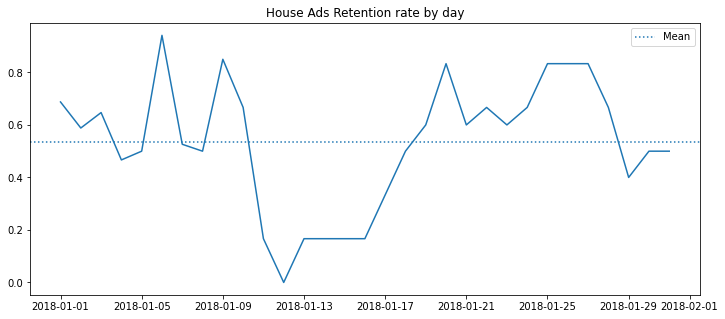

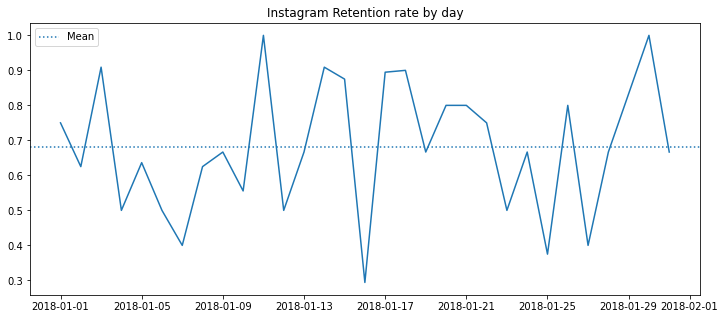

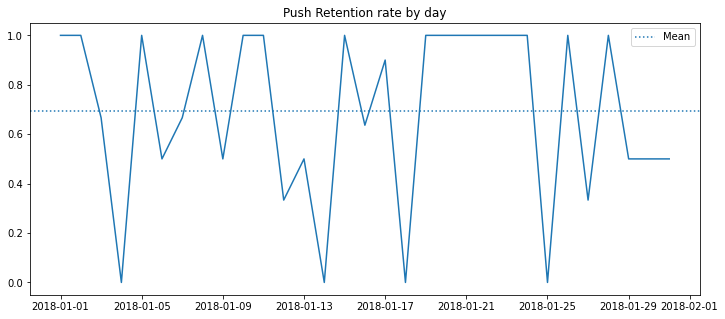

In [37]:
for col in daily_retention.columns:
    plt.figure(figsize=(12,5))
    
    plt.plot(daily_retention.index, daily_retention[col])
    plt.axhline(daily_retention[col].mean(), ls=':', label='Mean')
    plt.title(str(col) + ' Retention rate by day')
    plt.legend()
    plt.show();

# Q8. Determine why House ads saw lower than usual conversion rates during late January.

In [38]:
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack())

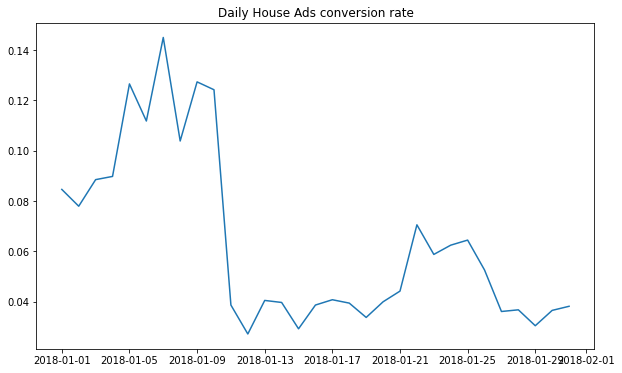

In [39]:
plt.figure(figsize=(10,6))
plt.title('Daily House Ads conversion rate')

plt.plot(daily_conv_channel['House Ads']);

### Find out which variable could explain the decrese in House Ads retention rate
* Begin with `DoW_served`: Day of Week



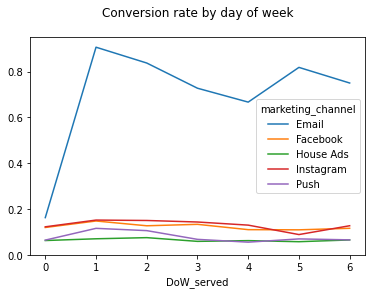

In [40]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

* house ads appear stable across the week with a slight peak on Tuesday. 


### Analyse House Ads retention by `language_displayed` variable

In [42]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

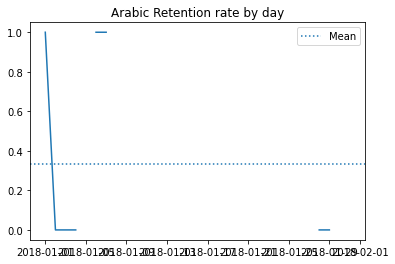

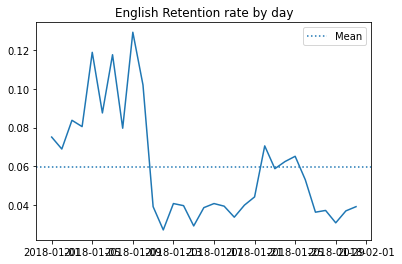

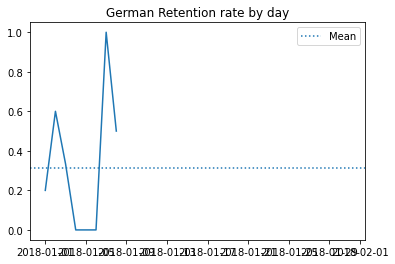

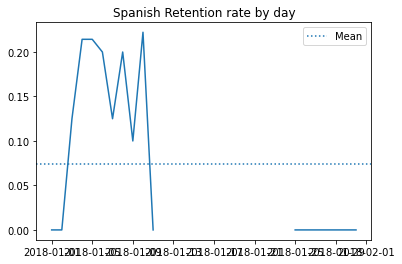

In [43]:
for col in conv_lang_df.columns:
    
    plt.plot(conv_lang_df.index, conv_lang_df[col])
    plt.axhline(conv_lang_df[col].mean(), ls=':', label='Mean')
    plt.title(str(col) + ' Retention rate by day')
    plt.legend()
    plt.show();

## Are users seeing house ads in their preferred language?
* the English conversion rate drops around the 11th
* and there do not appear to be ads served in other languages for a two week period. 

In [44]:
correct_lang_df = house_ads.groupby(['date_served', 'is_correct_lang'])['is_correct_lang'].count().unstack().fillna(0)
correct_lang_df

is_correct_lang,No,Yes
date_served,,
2018-01-01,2.0,189.0
2018-01-02,3.0,247.0
2018-01-03,0.0,220.0
2018-01-04,0.0,168.0
2018-01-05,0.0,160.0
2018-01-06,1.0,151.0
2018-01-07,2.0,130.0
2018-01-08,0.0,154.0
2018-01-09,0.0,157.0


## Confirming house ads error
* calculate percentage of users being served ads in their preferred language

In [45]:
correct_lang_df['pct'] = correct_lang_df.Yes / correct_lang_df.sum(axis=1)
correct_lang_df.head()

is_correct_lang,No,Yes,pct
date_served,,,
2018-01-01,2.0,189.0,0.989529
2018-01-02,3.0,247.0,0.988000
2018-01-03,0.0,220.0,1.000000
2018-01-04,0.0,168.0,1.000000
2018-01-05,0.0,160.0,1.000000


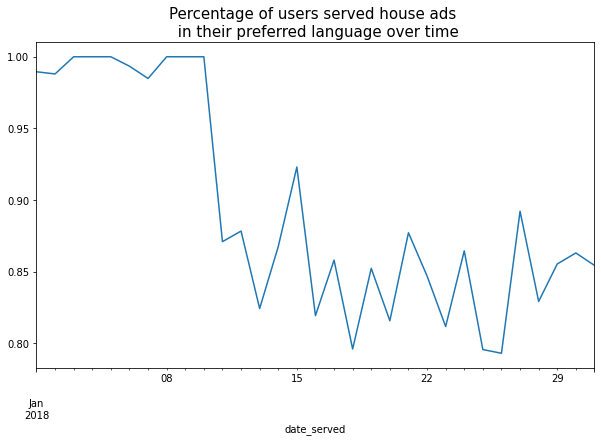

In [48]:
plt.figure(figsize=(10,6))
plt.title('Percentage of users served house ads \n in their preferred language over time', fontsize=15)
correct_lang_df['pct'].plot();

### It appears the problem was that users were seeing ads not in their preferred language

# A/B testing Conversion Rate
**Test allocation**

The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

## 1. Check to ensure users were allocated equally to the test and control groups.

In [225]:
# extract data where marketing channel is Email
email = marketing[marketing.marketing_channel=='Email']
email

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,DoW,DoW_served
354,a100000526,2018-01-01,Email,personalization,True,Arabic,Arabic,0-18 years,2018-01-01,NaT,Email,True,4.0,Yes,0.0,0.0
358,a100000530,2018-01-05,Email,personalization,True,Arabic,Arabic,19-24 years,2018-01-05,NaT,Email,True,4.0,Yes,4.0,4.0
362,a100000534,2018-01-09,Email,personalization,False,English,English,45-55 years,2018-01-09,NaT,Email,True,4.0,Yes,1.0,1.0
366,a100000538,2018-01-13,Email,personalization,True,Arabic,Arabic,24-30 years,2018-01-13,2018-01-23,Email,False,4.0,Yes,5.0,5.0
370,a100000542,2018-01-17,Email,personalization,True,English,English,0-18 years,2018-01-17,2018-02-12,Email,False,4.0,Yes,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,a100007288,2018-01-17,Email,control,True,German,German,30-36 years,2018-01-17,2018-04-26,Email,False,4.0,Yes,2.0,2.0
10031,a100007289,2018-01-17,Email,control,True,German,German,36-45 years,2018-01-17,2018-01-27,Email,False,4.0,Yes,2.0,2.0
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,4.0,Yes,2.0,2.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,4.0,Yes,2.0,2.0


In [226]:
# groupby the variance column
alloc = email.groupby('variant')['user_id'].nunique()
alloc

variant
control            270
personalization    284
Name: user_id, dtype: int64

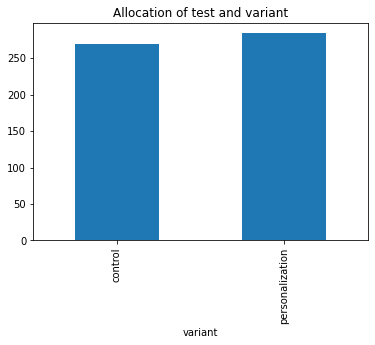

In [227]:
alloc.plot(kind='bar')
plt.title('Allocation of test and variant');

## 2. Compare conversion rates

In [235]:
converted = email.groupby(['variant','user_id'])['converted'].sum()

converted_df = pd.DataFrame(converted.unstack().T)

control = converted_df.control.dropna()
personalization = converted_df.personalization.dropna()


print('Control conversion rate: {:.3f}%'.format(np.mean(control)))
print('Variant conversion rate: {:.3f}%'.format(np.mean(personalization)))

Control conversion rate: 0.296%
Variant conversion rate: 0.398%


### Personalization converted users at a higher rate than the control

## 3. Calculate lift & significance level
* **Lift:** Relative percent difference. "Was the conversion rate higher for the treatment and by how much?"

In [206]:
def lift(a,b):
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    lift = (b_mean-a_mean)/a_mean
    
    return lift

In [207]:
print('Lift: {:.3f}%'.format(lift(control, personalization)))

Lift: 0.343%


## 4. Evaluate statistical significance

In [208]:
from scipy import stats

In [209]:
stats.ttest_ind(control.astype(int), personalization.astype(int))

Ttest_indResult(statistic=-2.3537219934322353, pvalue=0.018936125196550656)

### The personalization results are highly statistically significant

## 5. Calculate the lift and statistical significance across age groups

In [257]:
def email_ab_segmentation(segment):
    email_ab_stat = pd.DataFrame(columns=['lift_pct', 't', 'p'])
    
    for subsegment in np.unique(marketing[segment].values):
        # Create empty dataframe to store statistics

        # Select the email marketing channel
        email = marketing[(marketing.marketing_channel == 'Email') & (marketing[segment]==subsegment)]

        converted = email.groupby(['user_id', 'variant'])['converted'].sum()
        converted_df = pd.DataFrame(converted.unstack(level=1))
        control = converted_df.control.dropna()
        personalization = converted_df.personalization.dropna()

        # Calculate lift, t, p
        t,p = stats.ttest_ind(control.astype(int), personalization.astype(int))    
        email_ab_stat.loc[subsegment] = lift(control,personalization)*100, t, p

    return email_ab_stat

In [258]:
email_ab_segmentation('age_group')

,lift_pct,t,p
0-18 years,137.800000,-3.088640,0.002682
19-24 years,62.046908,-1.817466,0.071998
24-30 years,161.185185,-3.861540,0.000187
30-36 years,-100.000000,3.185906,0.002324
36-45 years,-85.227273,2.431790,0.017976
45-55 years,-74.358974,2.075532,0.042092
55+ years,-100.000000,3.326565,0.001636


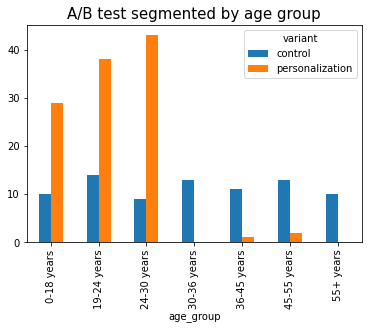

In [280]:
email = marketing[marketing.marketing_channel=='Email']
email_ab_age = pd.DataFrame(email.groupby(['age_group','variant'])['converted'].sum().unstack())


email_ab_age.plot(kind='bar')
plt.title('A/B test segmented by age group', fontsize=15);


### Found that personalization was extremely effective for younger groups but less effective than the control for older groups.
* One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.